# **Loading the Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# **Data Exploration**

In [3]:
df.shape

(10000, 14)

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
for col in df.columns.tolist():
  print(col, ':', df[col].nunique())
  print(df[col].unique())
  print()

RowNumber : 10000
[    1     2     3 ...  9998  9999 10000]

CustomerId : 10000
[15634602 15647311 15619304 ... 15584532 15682355 15628319]

Surname : 2932
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']

CreditScore : 460
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 5

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
continuous = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

discrete_categorical = ['Geography', 'Gender']

discrete_count = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

time_series = []

**Descriptive Statistics**

In [8]:
df[continuous].describe()

,CreditScore,Age,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881
std,96.653299,10.487806,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,11.580000
25%,584.000000,32.000000,0.000000,51002.110000
50%,652.000000,37.000000,97198.540000,100193.915000
75%,718.000000,44.000000,127644.240000,149388.247500
max,850.000000,92.000000,250898.090000,199992.480000


In [9]:
df[discrete_categorical].describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [10]:
df[continuous].skew()

CreditScore       -0.071607
Age                1.011320
Balance           -0.141109
EstimatedSalary    0.002085
dtype: float64

In [11]:
df[continuous].corr()

,CreditScore,Age,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.006268,-0.001384
Age,-0.003965,1.000000,0.028308,-0.007201
Balance,0.006268,0.028308,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.012797,1.000000


In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

**Plots**

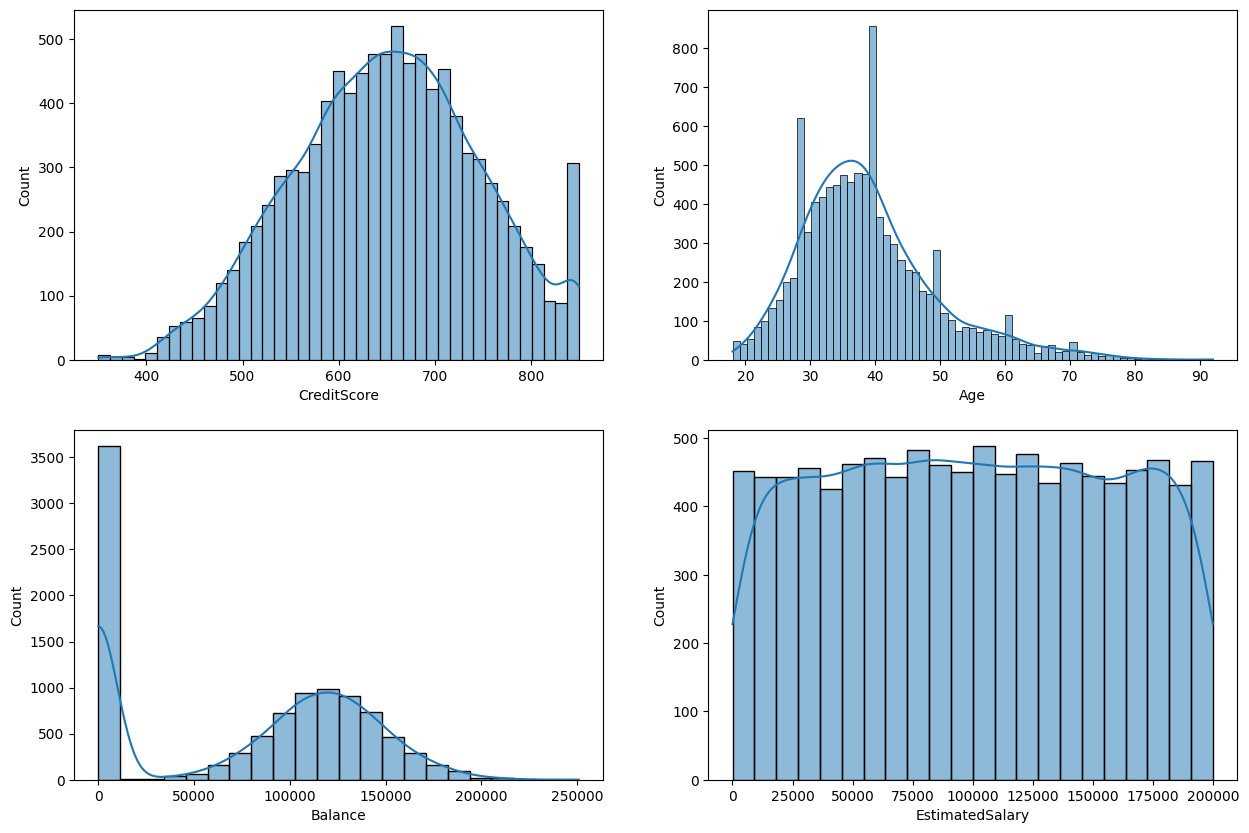

In [14]:
i = 1
plt.figure(figsize = (15, 10))
for col in continuous:
  plt.subplot(2, 2, i)
  sns.histplot(df[col], kde = True)
  i += 1
plt.show()

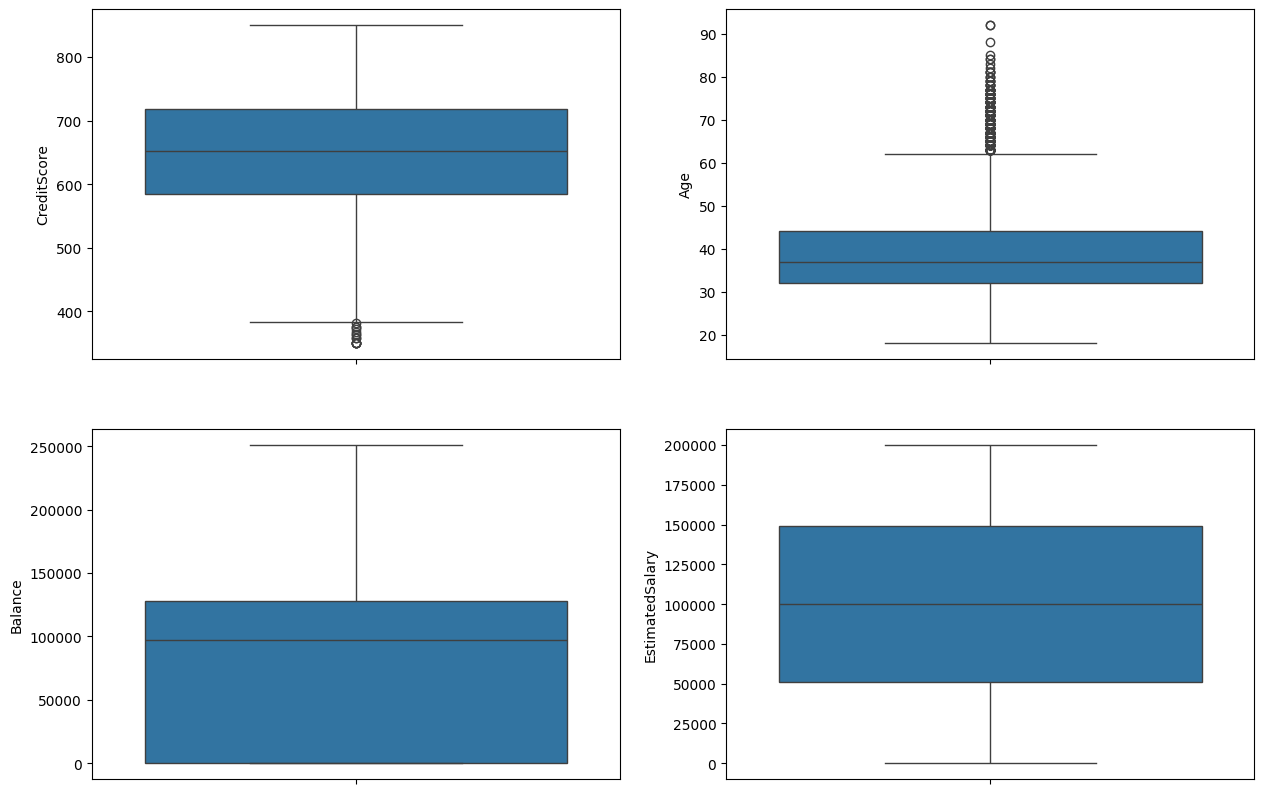

In [15]:
i = 1
plt.figure(figsize = (15, 10))
for col in continuous:
  plt.subplot(2, 2, i)
  sns.boxplot(df[col])
  i += 1
plt.show()

<Axes: >

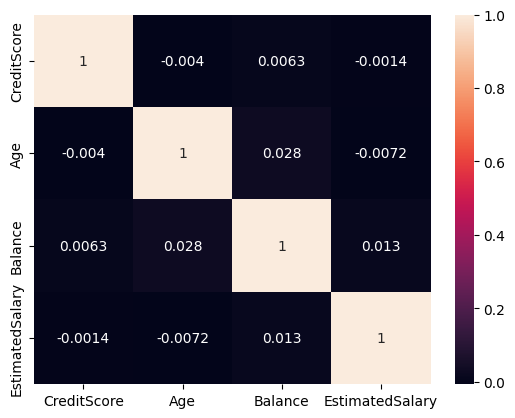

In [16]:
sns.heatmap(df[continuous].corr(), annot = True)

# **Data Preprocessing**

# 1. Data Cleaning

No data cleaning is required

In [17]:
df = df.drop(columns = {'RowNumber', 'CustomerId', 'Surname'})

In [18]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# 2. Data Wrangling

**1. Data Transformation**

In [19]:
df[continuous].skew()

CreditScore       -0.071607
Age                1.011320
Balance           -0.141109
EstimatedSalary    0.002085
dtype: float64

In [20]:
from scipy.stats import boxcox

df['Age'], param = boxcox(df['Age'])

**2. Encoding**

In [21]:
df = pd.get_dummies(df, drop_first = True, dtype = int)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,2.530867,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,2.520414,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,2.530867,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,2.498541,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,2.541019,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,2.498541,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,2.450363,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,2.463018,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,2.530867,3,75075.31,2,1,0,92888.52,1,1,0,1


**Finding the best random_state value**

In [22]:
X = df.drop(columns = {'Exited'})
y = df['Exited']

In [23]:
Accuracy_Train = []
CV = []

for i in range(1, 100):
  #Train Test Split
  from sklearn.model_selection import train_test_split

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)

  #Scaling
  from sklearn.preprocessing import StandardScaler

  ss = StandardScaler()
  X_train.iloc[:, [0, 1, 3, 7]] = ss.fit_transform(X_train.iloc[:, [0, 1, 3, 7]])
  X_test.iloc[:, [0, 1, 3, 7]] = ss.transform(X_test.iloc[:, [0, 1, 3, 7]])

  #Modelling
  from sklearn.linear_model import LogisticRegression

  model = LogisticRegression(random_state = True)
  model.fit(X_train, y_train)

  #Prediction
  ypred_train = model.predict(X_train)

  #Evaluation  
  from sklearn.metrics import accuracy_score

  accuracy_train = accuracy_score(y_train, ypred_train)

  from sklearn.model_selection import cross_val_score

  cv = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy').mean()

  Accuracy_Train.append(accuracy_train)
  CV.append(cv)

data1 = pd.DataFrame({'Accuracy_Train' : Accuracy_Train, 'CV' : CV})
data2 = data1[data1['Accuracy_Train'] - data1['CV'] <= 0.05]
data3 = data2[data2['CV'] == data2['CV'].max()]
rs = data3.index.tolist()[0]
rs

35

# **ANN**

In [24]:
X = df.drop(columns = {'Exited'})
y = df['Exited']

**Train Test Split**

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 35)

In [26]:
X_train.shape

(8000, 11)

**Scaling**

In [27]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train.iloc[:, [0, 1, 3, 7]] = ss.fit_transform(X_train.iloc[:, [0, 1, 3, 7]])
X_test.iloc[:, [0, 1, 3, 7]] = ss.transform(X_test.iloc[:, [0, 1, 3, 7]])

**Designing of ANN Model**

In [28]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

ann = Sequential()

ann.add(Dense(input_dim = 11, units = 22, activation = 'relu', kernel_initializer = 'uniform'))
ann.add(Dense(units = 22, activation = 'relu', kernel_initializer = 'uniform'))
ann.add(Dense(units = 22, activation = 'relu', kernel_initializer = 'uniform'))
ann.add(Dense(units = 22, activation = 'relu', kernel_initializer = 'uniform'))
ann.add(Dense(units = 22, activation = 'relu', kernel_initializer = 'uniform'))
ann.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Modelling + Evaluation**

In [29]:
#Modelling
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7917 - loss: 0.5991 
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7994 - loss: 0.4360 
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.4295 
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8202 - loss: 0.4199 
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8326 - loss: 0.4105 
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8349 - loss: 0.4146 
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8383 - loss: 0.4069 
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8288 - loss: 0.4168 
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8313 - loss: 0.4115 
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8367 - loss: 0.4147 
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8367 - loss: 0.4085 
Epoch 12/100
250/250 ━━━━━━━━━

In [30]:
#Prediction
ypred_train = (ann.predict(X_train) >= 0.5).astype(int)
ypred_test = (ann.predict(X_test) >= 0.5).astype(int)

#Evaluation
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, ypred_train)
accuracy_test = accuracy_score(y_test, ypred_test)

print('Accuracy(train): ', accuracy_train)
print('Accuracy(test): ', accuracy_test)

if (abs(accuracy_train - accuracy_test) <= 0.05):
  print('Good Model')
else:
  print('Bad Model')

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy(train):  0.87025
Accuracy(test):  0.8565
Good Model


**Cross Validate Model**

In [31]:
def build_cross_classifier():
  ann = Sequential()

  ann.add(Dense(input_dim = 11, units = 22, activation = 'relu', kernel_initializer = 'uniform'))
  ann.add(Dense(units = 22, activation = 'relu', kernel_initializer = 'uniform'))
  ann.add(Dense(units = 22, activation = 'relu', kernel_initializer = 'uniform'))
  ann.add(Dense(units = 22, activation = 'relu', kernel_initializer = 'uniform'))
  ann.add(Dense(units = 22, activation = 'relu', kernel_initializer = 'uniform'))
  ann.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform'))
  
  ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  return ann

In [32]:
from scikeras.wrappers import KerasClassifier

classifier = KerasClassifier(build_cross_classifier, batch_size = 32, epochs = 100)

In [33]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(classifier, X_train, y_train, cv = 5, scoring = 'accuracy').mean()

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7935 - loss: 0.6187  
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7925 - loss: 0.4409    
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7887 - loss: 0.4359 
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7971 - loss: 0.4251 
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7893 - loss: 0.4384 
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8019 - loss: 0.4292 
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8133 - loss: 0.4359 
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8248 - loss: 0.4261 
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8239 - loss: 0.4193 
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8148 - loss: 0.4392 
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8253 - loss: 0.4271 
Epoch 12/100
200/200 ━━━━━

In [34]:
cv

np.float64(0.850125)

In [35]:
print('Accuracy(train): ', accuracy_train)
print('Cv-Score: ', cv)
print('Accuracy(test): ', accuracy_test)

if (abs(cv - accuracy_train) <= 0.05) and (abs(accuracy_train - accuracy_test) <= 0.05):
  print('Good Model')
else:
  print('Bad Model')

Accuracy(train):  0.87025
Cv-Score:  0.850125
Accuracy(test):  0.8565
Good Model


In [36]:
# Accuracy(train):  0.870375
# Cv-Score:  0.8545
# Accuracy(test):  0.8575
# Good Model